In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.rename(columns={'Annual Income (k$)': 'Income',
                   'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<function matplotlib.pyplot.show(close=None, block=None)>

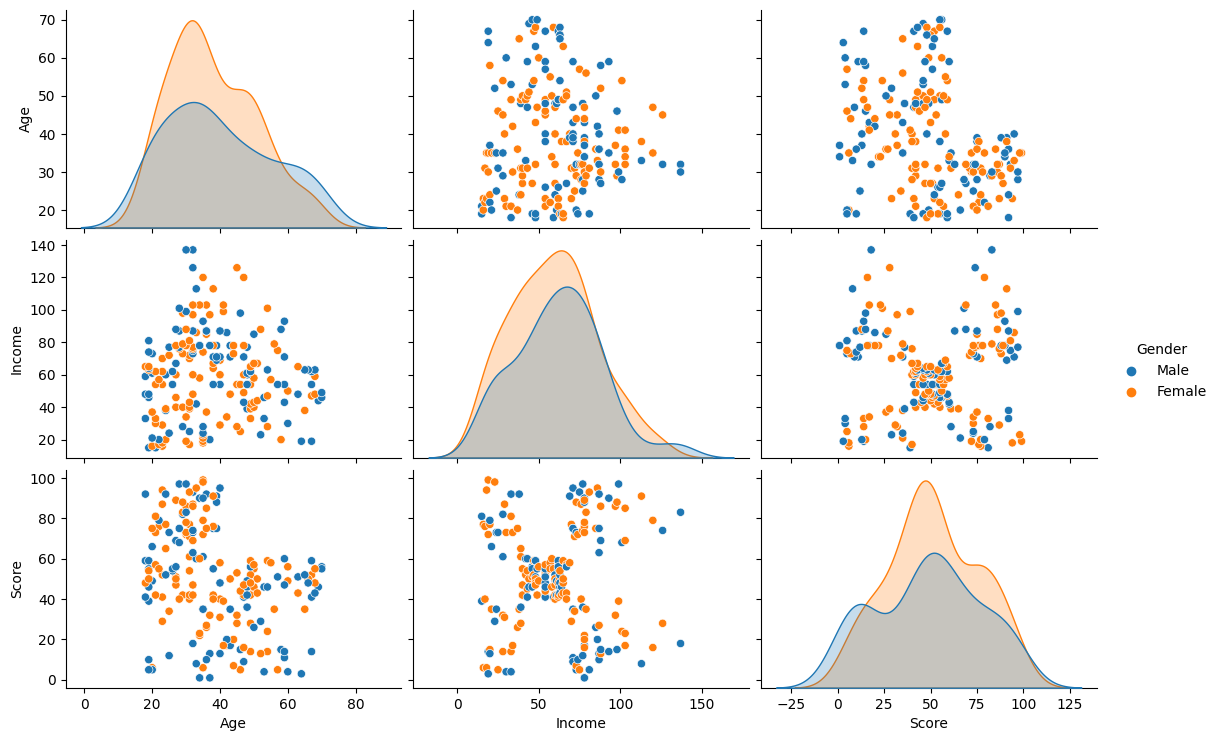

In [ ]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show

From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will X parameter from now on

# K Means

## Elbow Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

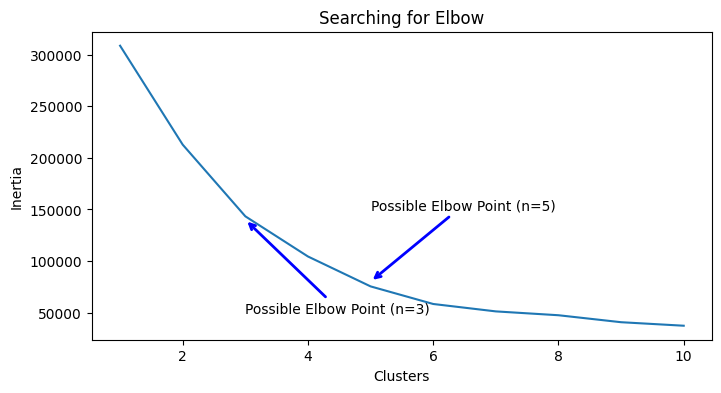

In [ ]:
from matplotlib.patches import ArrowStyle
from sklearn.cluster import KMeans

clusters = []
X = df.drop(['CustomerID','Gender'],axis=1)

for i in range(1,11):
  km = KMeans(n_clusters=i,random_state=102).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow

ax.annotate('Possible Elbow Point (n=3)', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
            arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3', 'color': 'blue', 'lw': 2})

ax.annotate('Possible Elbow Point (n=5)', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
            arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3', 'color': 'blue', 'lw': 2})

plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see the graph, we can say this may be either 3 or 5. Let's see both resluts in graph and decode.

# Creating Visual Plots

## KMeans- 3 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


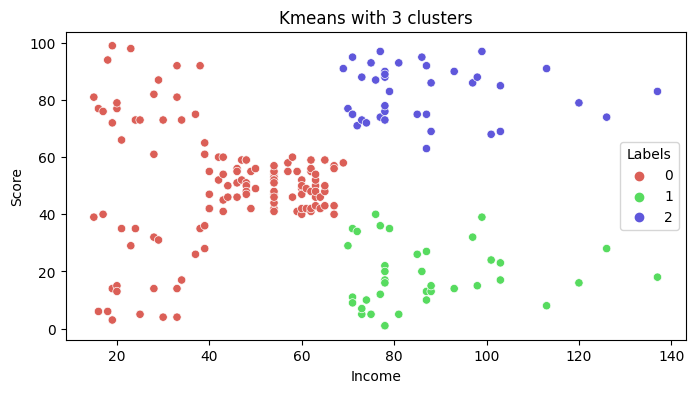

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=3, random_state=102).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('Kmeans with 3 clusters')
plt.show()

## KMeans- 5 Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


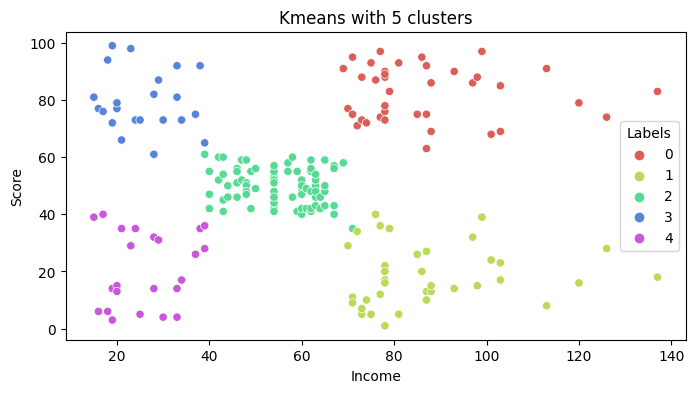

In [ ]:
# 5 cluster
km5 = KMeans(n_clusters=5, random_state=102).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(8, 4))
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Kmeans with 5 clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, km5.labels_)


0.4448928509007986

By jugding from the plots we could say that 5 clusters seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at all the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:


*   Label 0 is high income and low spending
*   Label 1 is mid income and mid spending
*   Label 2 is high income and high spending
*   Label 3 is low income and low spending
*   Label 4 is low income and high spending

Also let's see them more clearly with swarmplot:


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


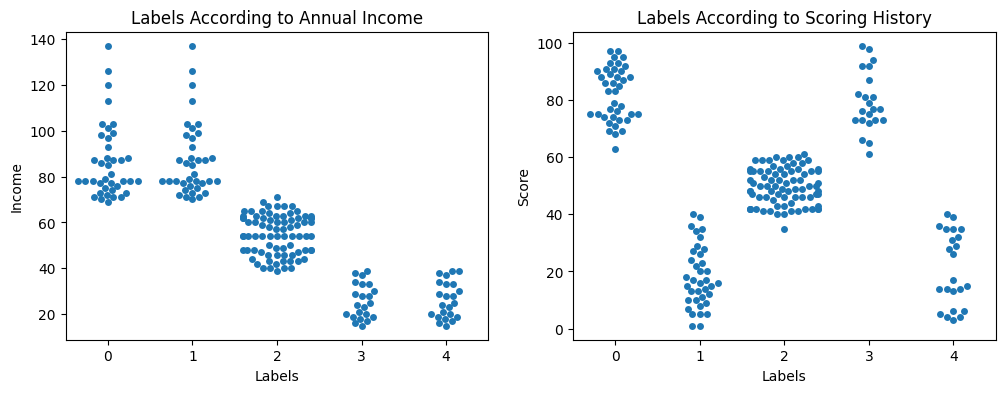

In [ ]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

## Hierarchical Clustering

### Agglomerative

We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Agglomerative is the bottom up approach which is more popular than Divisive clustering.

We will also using Complete Linkage as the Linkage Criteria.


*   **n_clusters**: The number of clusters to form as well as the number of centroids to generate.
*   **linkage**: Which linkage criterion to use: The linkage criterion determinations which distance to use between sets of observastion. The algorithm will merge the pairs of the cluster that minimize this criterion.


        *   Value will be: 'Complete'
        *   Note: It is recommended that try everything with 'average' as well





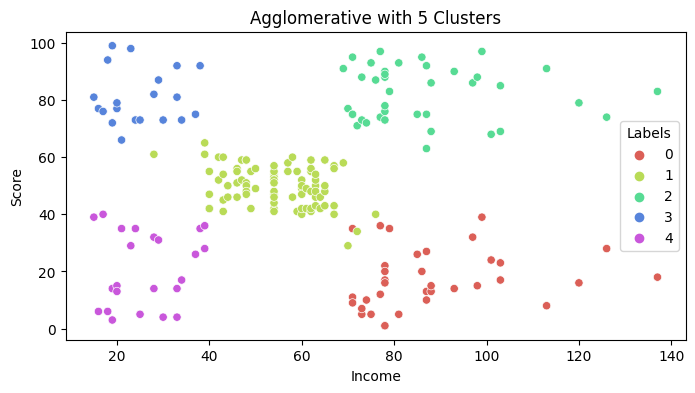

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglom =  AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

### Dendrogram Associated for the Agglomerative Hierarchical Clustering

Remember that a distance matrix contains the distance from each other point of a dataset. We can use the function distance_matrix, which requires two inputs. Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)

<ipython-input-13-15cb6b896777>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z =  hierarchy.linkage(dist, 'complete')


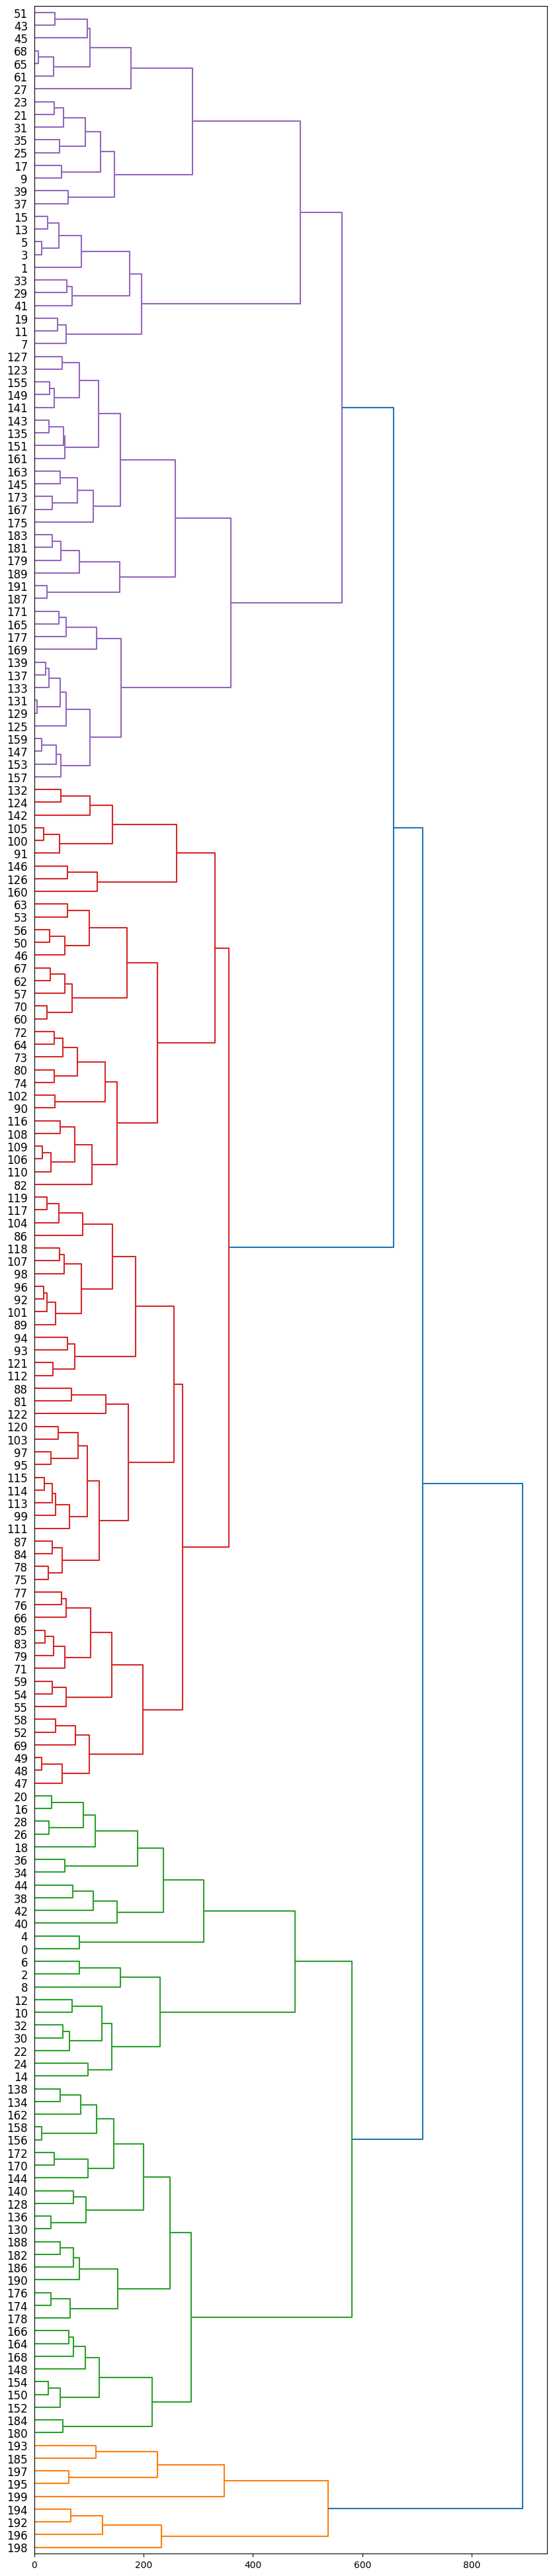

In [ ]:
Z =  hierarchy.linkage(dist, 'complete')

plt.figure(figsize=(10,50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')



## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

The heatmap below illustrates the number of clusters generated by the DBSCAN algorithm for different combinations of parameters.

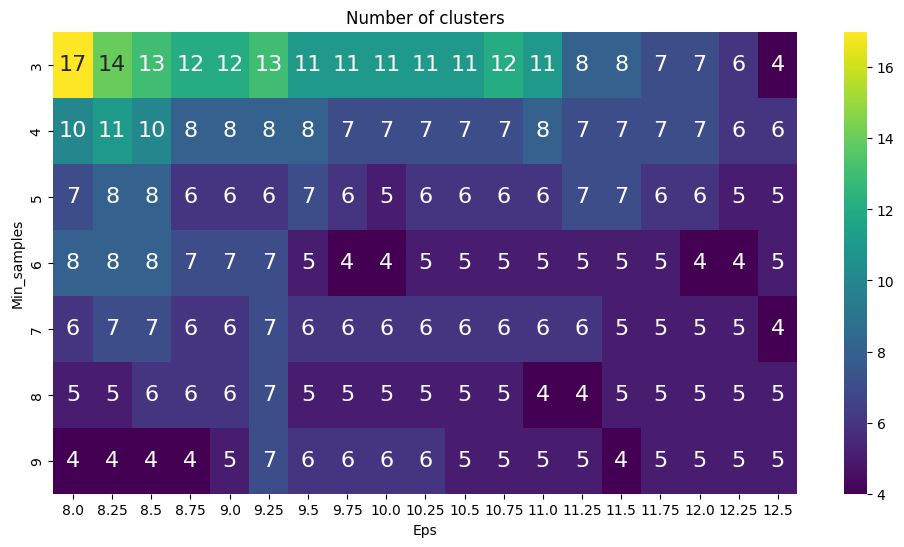

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="viridis", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The most combinations result in 4-7 clusters. To determine which combination to select, use metric known as the silhouette score.

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
best_eps_value, best_min_samples_value = pivot_1.stack().idxmax()
best_silhouette_score = pivot_1.stack().max()

print("Best EPS:", best_eps_value)
print("Best Min_samples:", best_min_samples_value)
print("Best Silhouette Score:", best_silhouette_score)

Best EPS: 4
Best Min_samples: 12.5
Best Silhouette Score: 0.2555034489203779


Then choose Best eps and Min_Samples

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)

DBSCAN_clustered = X.assign(Cluster=DBS_clustering.labels_)

#Checking sizes of clusters.
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().rename("DBSCAN_size").reset_index()
print(DBSCAN_clust_sizes)

   Cluster  DBSCAN_size
0       -1           18
1        0          112
2        1            8
3        2           34
4        3           24
5        4            4


DBSCAN created 5 clusters plus outliers cluster (-1) containing 18 outliers.

<ipython-input-20-4982e4843a46>:4: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X['Income'],


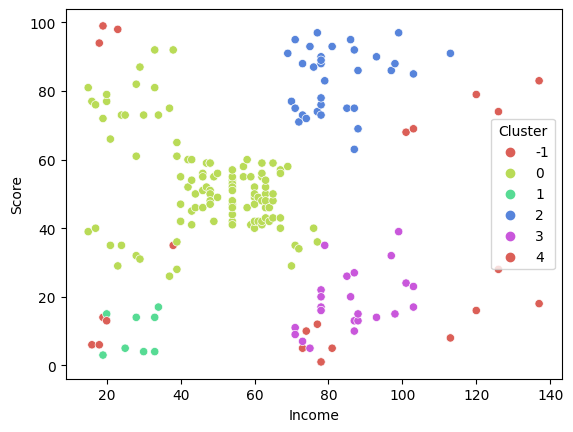

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_clustered = X.assign(Cluster=DBS_clustering.labels_)

sns.scatterplot(x=X['Income'],
                y=X['Score'],
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue=DBSCAN_clustered['Cluster'],
                palette=sns.color_palette('hls', 5))

plt.show()

# Wrapping it up

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-d1ea570fd1c8>:36: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X['Income'],


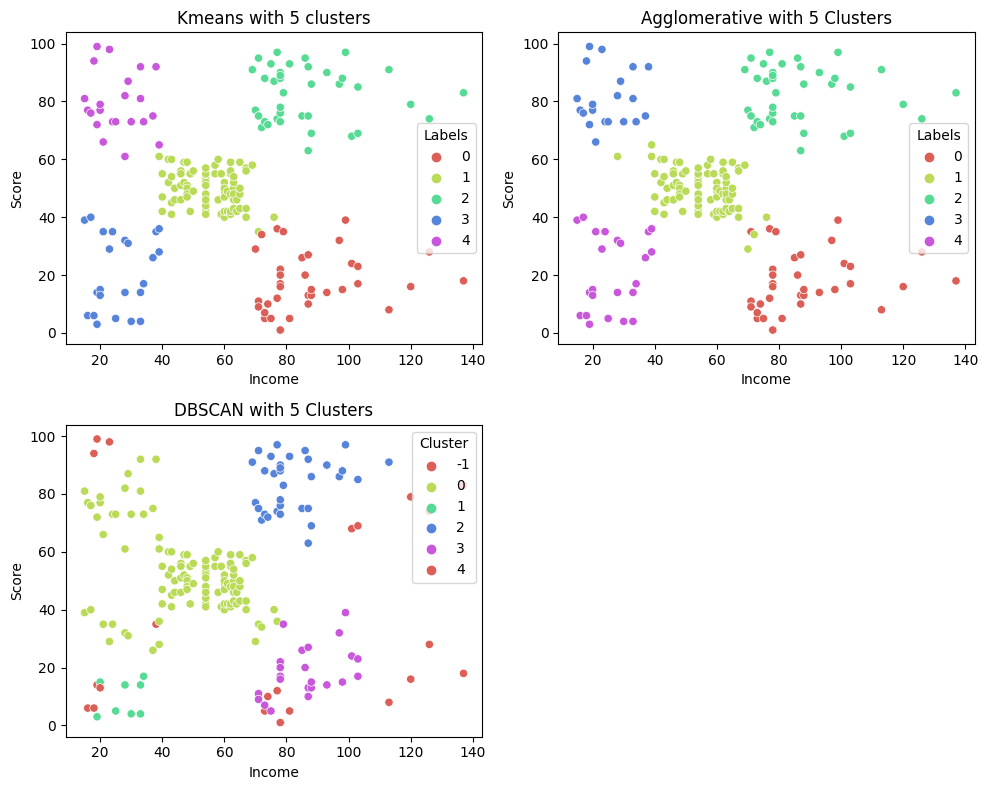

In [ ]:
fig = plt.figure(figsize=(10,8))

# KMeans
ax = fig.add_subplot(221)

X = X.drop(columns='Labels')

km5 = KMeans(n_clusters=5, random_state=102).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Kmeans with 5 clusters')


# Agglomerative Clustering
ax = fig.add_subplot(222)

X = X.drop(columns='Labels')

agglom =  AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(x=X['Income'],
                y=X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('Agglomerative with 5 Clusters')

# DBSCAN Clustering
ax = fig.add_subplot(223)

DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_clustered = X.assign(Cluster=DBS_clustering.labels_)

sns.scatterplot(x=X['Income'],
                y=X['Score'],
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue=DBSCAN_clustered['Cluster'],
                palette=sns.color_palette('hls', 5))
plt.title('DBSCAN with 5 Clusters')

plt.tight_layout()
plt.show()

# DBSCAN Explanation

Based on the plotted results above, the performance of DBSCAN is highly sensitive to the values of **min_samples** and **eps.** Even though this project has utilized the combination of min_samples and eps with the highest silhouette score, the DBSCAN clustering still presents suboptimal cluster classifications due to the presence of numerous outliers. The outcomes achieved do not effectively represent the nuances in Income and Spending Score within specific clusters.

In contrast, the K-Means and Agglomerative Clustering methods may provide more suitable alternatives. K-Means tends to work well when the clusters are relatively well-defined and spherical, while Agglomerative Clustering is capable of capturing hierarchical relationships in the data. Further exploration and comparison of these alternative methods might yield improved clusterings for this dataset.

In summary, the DBSCAN clustering results indicate that it may not be the most suitable method for this dataset or that further preprocessing or feature engineering may be required to enhance its performance.